In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, MaxPool2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from architectures import composite_convolutional_layer
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape the data to include channel dimension
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize the pixel values
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to categorical data
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Create generator that transforms the images
datagen = ImageDataGenerator(width_shift_range=0.15, height_shift_range=0.15)

# Fit the generator to the training images
datagen.fit(train_images)


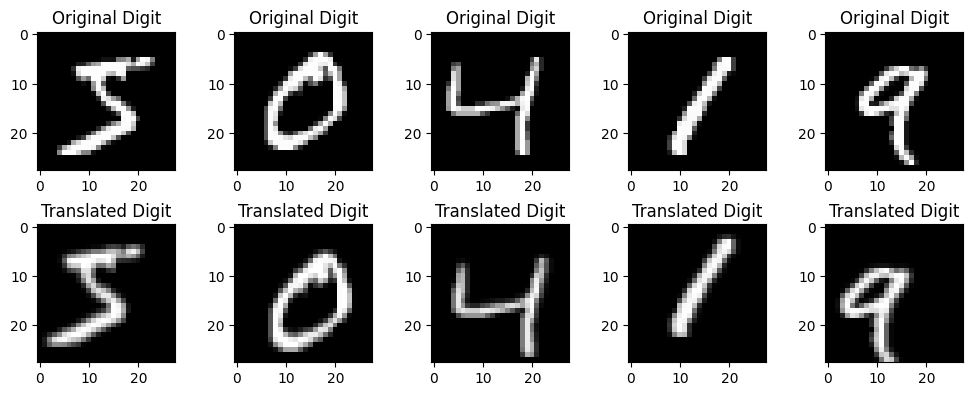

In [3]:
image_count = 5

subset = train_images[:image_count]  # Taking the first 5 images as samples

# Plot images
fig, ax = plt.subplots(nrows=2, ncols=image_count, figsize=(10, 4))

# Original images and corresponding augmented images
for i in range(image_count):
    # Original image
    ax[0, i].imshow(np.squeeze(subset[i]), cmap='gray')
    ax[0, i].set_title('Original Digit')

    # Augmented image
    aug_iter = datagen.flow(subset[i:i+1], batch_size=1)
    aug_image = next(aug_iter)[0]
    ax[1, i].imshow(np.squeeze(aug_image), cmap='gray')
    ax[1, i].set_title('Translated Digit')

plt.tight_layout()
plt.show()

In [4]:
# Setting parameters for Stochastic Gradient Descent (SGD) with Backpropagation Training of Multi-Layer Perceptron (MLP):
minibatch_size = 64  # Mini-batch size for SGD
learning_rate = 0.01  # Learning rate for SGD
momentum = 0.09  # Momentum for SGD
max_epochs = 50  # Maximum number of epochs before stopping training

dropout_rate = 0.2  # Dropout rate for the Dropout layers

# Create model architecture
model = Sequential([
    Input(shape=(28, 28, 1)),

    *composite_convolutional_layer(32, 4, 'relu', dropout_rate),
    MaxPool2D((2, 2)),

    *composite_convolutional_layer(32, 4, 'relu', dropout_rate),
    MaxPool2D((2, 2)),

    *composite_convolutional_layer(32, 4, 'relu', dropout_rate),
    MaxPool2D((2, 2)),

    GlobalAveragePooling2D(),
    Dense(10, activation='softmax')
])

# Use SGD with momentum
optimizer = SGD(learning_rate, momentum)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        544       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        1

In [5]:
history = model.fit(train_images, train_labels, epochs=max_epochs, batch_size=minibatch_size,
                    validation_data=(test_images, test_labels))


Epoch 1/50
938/938 [==============================] - 61s 64ms/step - loss: 1.3277 - accuracy: 0.5701 - val_loss: 0.8815 - val_accuracy: 0.8497
Epoch 2/50
938/938 [==============================] - 58s 62ms/step - loss: 0.5816 - accuracy: 0.8309 - val_loss: 0.4547 - val_accuracy: 0.9444
Epoch 3/50
938/938 [==============================] - 57s 61ms/step - loss: 0.3847 - accuracy: 0.8902 - val_loss: 0.3252 - val_accuracy: 0.9541
Epoch 4/50
938/938 [==============================] - 59s 63ms/step - loss: 0.2983 - accuracy: 0.9140 - val_loss: 0.2857 - val_accuracy: 0.9501
Epoch 5/50
938/938 [==============================] - 64s 68ms/step - loss: 0.2487 - accuracy: 0.9274 - val_loss: 0.2209 - val_accuracy: 0.9614
Epoch 6/50
938/938 [==============================] - 68s 72ms/step - loss: 0.2172 - accuracy: 0.9364 - val_loss: 0.2559 - val_accuracy: 0.9362
Epoch 7/50
938/938 [==============================] - 66s 71ms/step - loss: 0.1941 - accuracy: 0.9433 - val_loss: 0.1692 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


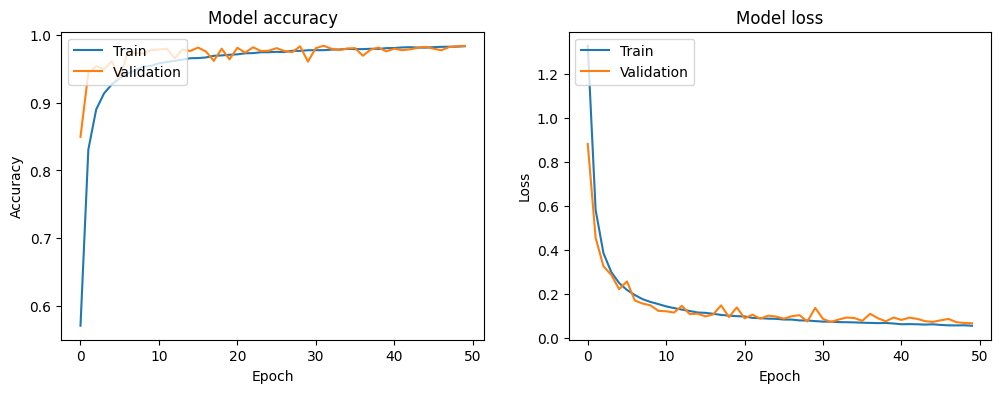

In [6]:
# List all data in history
print(model.history.history.keys())

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()